**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import metrics
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree

# %load_ext pycodestyle_magic

In [2]:
# %%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.neighbors_amount = n_neighbors
        self.algorithm = algorithm
        self.x_data = None
        self.x_tree = None
        self.y_data = None
        self.y_classes = None
        self.classes_amount = None

    def fit(self, X, y):
        self.y_data = np.array(y).astype(int)
        self.y_classes = np.unique(y)
        self.classes_amount = len(np.unique(y))
        if self.algorithm == 'brute':
            self.x_data = np.array(X).astype(float)
        if self.algorithm == 'kd_tree':
            self.x_tree = KDTree(np.array(X).astype(float))

    def predict(self, X):
        return np.apply_along_axis(
            _find_mode,
            1,
            self._nearest_classes(X))

    def predict_proba(self, X):
        return np.apply_along_axis(
            self._nearest_classes_probability,
            1,
            self._nearest_classes(X)
        )

    def _nearest_classes_probability(self, arr):
        return np.bincount(arr, minlength=self.classes_amount) / self.neighbors_amount

    def _nearest_classes(self, X):
        indexes = None
        if self.algorithm == 'brute':
            X = X.astype(float)
            distances = metrics.pairwise_distances(X, self.x_data)
            indexes = distances.argpartition(self.neighbors_amount)[:, :self.neighbors_amount]
        if self.algorithm == 'kd_tree':
            _, indexes = self.x_tree.query(X, k=self.neighbors_amount)
        return self.y_data[indexes]

    def score(self, X, y):
        return len([1 for i, x in enumerate(self.predict(X)) if x == y[i]]) / len(y)


def _find_mode(raw_array):
    return np.bincount(raw_array).argmax()

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 958 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [8]:
%time clf.predict(X_test)

Wall time: 1.99 ms


array([2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1])

In [9]:
%time my_clf.predict(X_test)

Wall time: 6.98 ms


array([2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1], dtype=int64)

In [10]:
%time clf.predict_proba(X_test)

Wall time: 1.96 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

Wall time: 958 µs


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [14]:
def score_measure(neighbors, test_amount):
    result = np.zeros(neighbors, float)
    for i in range(neighbors):
        res_per_neighbour = np.zeros(test_amount, dtype=float)
        for j in range(test_amount):
            X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1,
                                                                stratify=iris.target)
            model = MyKNeighborsClassifier(i + 1)
            model.fit(X_train, y_train)
            res_per_neighbour[j] = model.score(X_test, y_test)
        result[i] = res_per_neighbour.mean()
    return result

In [15]:
neighbors = 30
test_amount = 10000
score_result = score_measure(neighbors, test_amount)
"Best neighbors amount is - {}".format(score_result.argmax() + 1)

'Best neighbors amount is - 17'

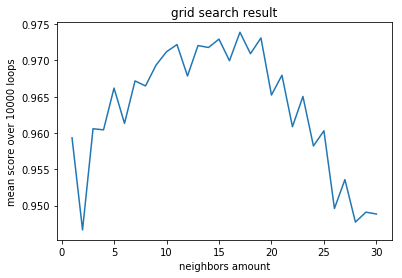

In [16]:
plt.plot(range(1, neighbors + 1), score_result)
plt.xlabel("neighbors amount")
plt.ylabel("mean score over {} loops".format(test_amount))
plt.title("grid search result")
plt.show()

**MNIST**

In [17]:
mnist = fetch_mldata('MNIST original')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [19]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [20]:
%time clf.fit(X_train, y_train)

Wall time: 42.9 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

Wall time: 298 ms


In [22]:
%time clf.predict(X_test)

Wall time: 2min 17s


array([4., 6., 2., 8., 1., 2., 8., 3., 5., 2., 4., 5., 3., 1., 2., 9., 4.,
       6., 6., 2., 4., 1., 8., 0., 4., 1., 8., 8., 3., 6., 3., 5., 6., 2.,
       9., 6., 2., 3., 7., 3., 1., 6., 9., 7., 0., 2., 0., 7., 2., 5., 4.,
       0., 0., 3., 6., 9., 5., 7., 7., 1., 0., 5., 3., 7., 9., 1., 6., 5.,
       6., 3., 1., 3., 2., 1., 6., 6., 7., 5., 3., 1., 8., 2., 2., 2., 9.,
       7., 5., 1., 5., 7., 6., 6., 9., 5., 1., 1., 7., 1., 3., 2., 8., 9.,
       4., 0., 4., 9., 1., 7., 7., 0., 8., 6., 3., 4., 7., 8., 7., 4., 0.,
       8., 2., 6., 7., 2., 2., 7., 1., 6., 1., 9., 8., 5., 1., 3., 0., 0.,
       5., 4., 6., 2., 8., 5., 0., 9., 5., 1., 3., 3., 9., 2., 4., 6., 0.,
       9., 3., 0., 0., 0., 3., 7., 0., 8., 1., 6., 3., 1., 7., 9., 8., 2.,
       0., 4., 7., 5., 3., 6., 2., 9., 8., 3., 9., 4., 9., 4., 0., 2., 9.,
       9., 9., 3., 6., 2., 5., 4., 8., 8., 4., 1., 8., 1., 8., 9., 2., 8.,
       7., 1., 0., 7., 4., 9., 3., 7., 4., 6., 2., 7., 2., 1., 1., 2., 7.,
       1., 3., 3., 7., 9.

In [23]:
%time my_clf.predict(X_test)

Wall time: 2.33 s


array([4, 6, 2, 8, 1, 2, 8, 3, 5, 2, 4, 5, 3, 1, 2, 9, 4, 6, 6, 2, 4, 1,
       8, 0, 4, 1, 8, 8, 3, 6, 3, 5, 6, 2, 9, 6, 2, 3, 7, 3, 1, 6, 9, 7,
       0, 2, 0, 7, 2, 5, 4, 0, 0, 3, 6, 9, 5, 7, 7, 1, 0, 5, 3, 7, 9, 1,
       6, 5, 6, 3, 1, 3, 2, 1, 6, 6, 7, 5, 3, 1, 8, 2, 2, 2, 9, 7, 5, 1,
       5, 7, 6, 6, 9, 5, 1, 1, 7, 1, 3, 2, 8, 9, 4, 0, 4, 9, 1, 7, 7, 0,
       8, 6, 3, 4, 7, 8, 7, 4, 0, 8, 2, 6, 7, 2, 2, 7, 1, 6, 1, 9, 8, 5,
       1, 3, 0, 0, 5, 4, 6, 2, 8, 5, 0, 9, 5, 1, 3, 3, 9, 2, 4, 6, 0, 9,
       3, 0, 0, 0, 3, 7, 0, 8, 1, 6, 3, 1, 7, 9, 8, 2, 0, 4, 7, 5, 3, 6,
       2, 9, 8, 3, 9, 4, 9, 4, 0, 2, 9, 9, 9, 3, 6, 2, 5, 4, 8, 8, 4, 1,
       8, 1, 8, 9, 2, 8, 7, 1, 0, 7, 4, 9, 3, 7, 4, 6, 2, 7, 2, 1, 1, 2,
       7, 1, 3, 3, 7, 9, 0, 5, 8, 7, 7, 2, 4, 4, 9, 0, 9, 6, 4, 3, 6, 1,
       9, 5, 1, 4, 4, 9, 2, 5, 4, 5, 2, 3, 7, 0, 5, 1, 1, 2, 2, 9, 3, 4,
       1, 1, 4, 1, 7, 5, 0, 6, 2, 3, 0, 9, 3, 1, 9, 1, 2, 1, 4, 6, 3, 5,
       8, 1, 7, 3, 8, 0, 4, 1, 8, 9, 8, 4, 8, 9, 0,

In [24]:
%time clf.predict_proba(X_test)

Wall time: 2min 19s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [25]:
%time my_clf.predict_proba(X_test)

Wall time: 2.4 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:
clf.score(X_test, y_test)

0.9628571428571429

In [27]:
my_clf.score(X_test, y_test)

0.9628571428571429

Задание 4

In [28]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [30]:
%time clf.fit(X_train, y_train)

Wall time: 42.9 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train, y_train)

Wall time: 41.7 s


In [32]:
%time clf.predict(X_test)

Wall time: 2min 18s


array([2., 9., 0., 1., 1., 3., 4., 1., 5., 9., 3., 7., 0., 9., 3., 2., 8.,
       6., 4., 6., 9., 1., 9., 0., 6., 6., 0., 0., 7., 0., 5., 8., 7., 6.,
       5., 7., 5., 5., 5., 7., 7., 5., 1., 5., 4., 3., 4., 3., 0., 5., 3.,
       0., 4., 7., 8., 8., 7., 8., 6., 9., 0., 1., 9., 2., 2., 3., 5., 2.,
       8., 3., 7., 4., 4., 7., 7., 2., 4., 0., 4., 9., 1., 2., 6., 2., 0.,
       4., 1., 9., 4., 0., 0., 0., 3., 0., 5., 3., 9., 7., 5., 1., 2., 0.,
       5., 4., 7., 0., 6., 9., 8., 4., 7., 3., 7., 0., 4., 6., 3., 0., 8.,
       6., 3., 3., 7., 6., 1., 1., 4., 2., 2., 4., 9., 1., 5., 3., 4., 8.,
       7., 4., 6., 3., 8., 1., 7., 0., 1., 0., 8., 9., 5., 2., 1., 4., 3.,
       9., 2., 8., 2., 2., 4., 1., 1., 9., 0., 8., 6., 6., 4., 9., 3., 0.,
       1., 5., 2., 6., 2., 5., 6., 5., 8., 7., 9., 1., 1., 1., 7., 8., 2.,
       7., 9., 5., 3., 9., 5., 8., 2., 5., 2., 9., 6., 5., 2., 9., 3., 4.,
       2., 7., 3., 2., 1., 4., 6., 1., 8., 0., 8., 9., 1., 1., 4., 2., 5.,
       3., 3., 6., 6., 9.

In [33]:
%time my_clf.predict(X_test)

Wall time: 1min 55s


array([2, 9, 0, 1, 1, 3, 4, 1, 5, 9, 3, 7, 0, 9, 3, 2, 8, 6, 4, 6, 9, 1,
       9, 0, 6, 6, 0, 0, 7, 0, 5, 8, 7, 6, 5, 7, 5, 5, 5, 7, 7, 5, 1, 5,
       4, 3, 4, 3, 0, 5, 3, 0, 4, 7, 8, 8, 7, 8, 6, 9, 0, 1, 9, 2, 2, 3,
       5, 2, 8, 3, 7, 4, 4, 7, 7, 2, 4, 0, 4, 9, 1, 2, 6, 2, 0, 4, 1, 9,
       4, 0, 0, 0, 3, 0, 5, 3, 9, 7, 5, 1, 2, 0, 5, 4, 7, 0, 6, 9, 8, 4,
       7, 3, 7, 0, 4, 6, 3, 0, 8, 6, 3, 3, 7, 6, 1, 1, 4, 2, 2, 4, 9, 1,
       5, 3, 4, 8, 7, 4, 6, 3, 8, 1, 7, 0, 1, 0, 8, 9, 5, 2, 1, 4, 3, 9,
       2, 8, 2, 2, 4, 1, 1, 9, 0, 8, 6, 6, 4, 9, 3, 0, 1, 5, 2, 6, 2, 5,
       6, 5, 8, 7, 9, 1, 1, 1, 7, 8, 2, 7, 9, 5, 3, 9, 5, 8, 2, 5, 2, 9,
       6, 5, 2, 9, 3, 4, 2, 7, 3, 2, 1, 4, 6, 1, 8, 0, 8, 9, 1, 1, 4, 2,
       5, 3, 3, 6, 6, 9, 6, 5, 4, 8, 3, 0, 6, 3, 5, 5, 8, 6, 5, 9, 9, 9,
       1, 8, 2, 0, 1, 0, 6, 2, 9, 3, 1, 5, 7, 4, 3, 7, 1, 1, 4, 4, 2, 9,
       8, 7, 6, 2, 7, 3, 8, 8, 9, 0, 1, 1, 0, 8, 1, 3, 1, 9, 2, 9, 2, 0,
       6, 7, 7, 1, 7, 7, 3, 6, 4, 8, 9, 1, 3, 1, 1,

In [34]:
%time clf.predict_proba(X_test)

Wall time: 2min 20s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 49s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [36]:
clf.score(X_test, y_test)

0.9742857142857143

In [37]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 5

In [ ]:
# seaborn
"""
Библиотека для визуализации данных, основывающаяся на matplotlib
"""
# matplotlib
"""
Matplotlib - это библиотека 2D-графики Python
"""
# train_test_split
"""
Разбивает массивы или матрицы на тренировочную и тестовую выборки.
"""
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
"""
Позволяет последовательно выполнять список действий над данными.
"""
# StandardScaler (from sklearn.preprocessing import StandardScaler)
"""
Приводим все фичи независимо друг от друга к единому виду с помощью вычитания среднего и деления на дисперсию.
"""
# ClassifierMixin
"""
Сдандартный Mixin класс для всех классификаторов в sklearn.
Содержит в себе метод score - показывающий среднее значение точности на выборке.
"""
# NeighborsBase
"""
Базовый класс для оценок ближайших соседей.
"""
# KNeighborsMixin
"""
Mixin класс для k-n поисков (содержит методы mro, kneighbors_graph, kneighbors)
"""
# SupervisedIntegerMixin
"""
Mixin class который предоставляет метод fit(self, X, y != None), который обучает модель используя Х как данные у как значения.
"""